In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_df = pd.read_csv("./Documents/stock.csv")

In [3]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
stock_df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
stock_df.duplicated().any()

False

In [8]:
stock_df.duplicated().sum()

0

In [9]:
stock_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

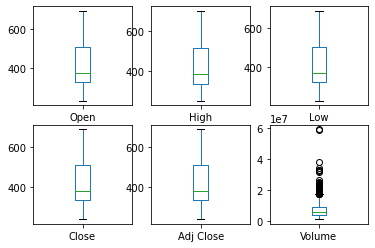

In [12]:
plt.subplot(2,3,1)
stock_df["Open"].plot(kind="box")

plt.subplot(2,3,2)
stock_df["High"].plot(kind="box")

plt.subplot(2,3,3)
stock_df["Low"].plot(kind="box")

plt.subplot(2,3,4)
stock_df["Close"].plot(kind="box")

plt.subplot(2,3,5)
stock_df["Adj Close"].plot(kind="box")

plt.subplot(2,3,6)
stock_df["Volume"].plot(kind="box")

In [15]:
def find_outlier_limits(col_name):
    Q1,Q3=stock_df[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)

high_v,low_v=find_outlier_limits('Volume')

stock_df.loc[stock_df['Volume']>high_v,'Volume']=high_v

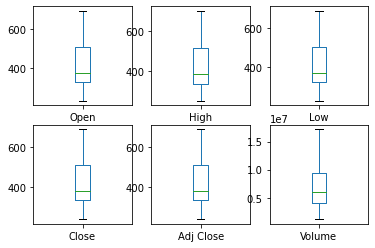

In [16]:
plt.subplot(2,3,1)
stock_df["Open"].plot(kind="box")

plt.subplot(2,3,2)
stock_df["High"].plot(kind="box")

plt.subplot(2,3,3)
stock_df["Low"].plot(kind="box")

plt.subplot(2,3,4)
stock_df["Close"].plot(kind="box")

plt.subplot(2,3,5)
stock_df["Adj Close"].plot(kind="box")

plt.subplot(2,3,6)
stock_df["Volume"].plot(kind="box")

In [17]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,17168150.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,17168150.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0


In [52]:
X = stock_df.iloc[:, 1:4]

In [53]:
y = stock_df.iloc[:,4]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [55]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test);

In [56]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [57]:
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
m = reg.coef_
c = reg.intercept_
m,c

(array([-0.60816875,  0.79207248,  0.81508864]), 0.772747617539892)

In [59]:
y_pred_train = reg.predict(X_train)

In [60]:
y_pred_test = reg.predict(X_test)

In [61]:
from sklearn.metrics import r2_score
r2_S = r2_score(y_train, y_pred_train)
r2_S

0.9987574350294742

In [62]:
from sklearn.metrics import r2_score
r2_S = r2_score(y_test, y_pred_test)
r2_S

0.9984871377371428

In [63]:
stock={'Open':[402.000000], 'High':[405.867905], 'Low':[392.475837]}
print(reg.predict(pd.DataFrame(stock)))

[397.66830724]
